# Set up
The first thing that we need to do is to import all the libraries that we are going to use.
For this first Notebook we need:

- **os**: The os module provides a way of using operating system dependent functionality e.g. importing files or changing directories
- **re**: The re module provides support for regular expressions e.g. searching, matching, and splitting the string according to specified patterns.
- **pandas**: The pandas module provides support to work with datasets e.g. data cleaning andand transformation
- **nltk**: The NLTK library allows you to work with human language data (natural language processing). It includes libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning
- **numpy**: The numpy module is for scientific computing with Python. This will help with performing linear algebra and mathematic operations on your dataset
- **codecs**: The codecs module helps dealing with encoding/decoding, especially Unicode
- **matplotlib**: The matplotlib module will allow you to create visualisations
- **seaborn**: The matplotlib module will allow you to create visualisations

In [115]:
import os
import re
import pandas as pd # We are renaming pandas as pd to be faster in calling it
import nltk
nltk.download('punkt_tab')# within nltk we need to download or import a series of submodules. Punkt is used for tokenizing sentences
nltk.download('stopwords')
from nltk.tokenize import word_tokenize # This is a specific import from the nltk.tokenize module, bringing in the word_tokenize function, which is used to split text into words.
from nltk.tokenize import sent_tokenize # Import the tokeniser by sentences
from nltk.corpus import stopwords # this import the stopwords
import numpy as np
import codecs
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Our Dataset
The Statistical Accounts of Scotland are a series of documentary publications, related in subject matter though published at different times, covering life in Scotland in the 18th and 19th.

The Old (or First) Statistical Account of Scotland was published between 1791 and 1799 by Sir John Sinclair of Ulbster. The New (or Second) Statistical Account of Scotland published under the auspices of the General Assembly of the Church of Scotland between 1834 and 1845. These first two Statistical Accounts of Scotland are unique records of life during the agricultural and industrial revolutions in Europe.

## Structure of the dataset
The original publication has been scanned and OCRed and each single record has been collected in a .txt file. The name of each file contain information about the document itself. For example StAS.2.15.91.P.Orkney.Cross_and_Burness

- StAs.2.15.91 -> Second Statistical Account
- P -> Parish (Contain information from the Parish)

- Orkney -> Area of interest (Scotland has been divided in 33 Areas)

- Cross_and_Burness -> Parish

We are going to see how to use this to extract information about all our text later but the first thing we need to do is to create a single dataframe (table) that will contain all the texts otherwise it will be very difficult to manage the data.

## Prepare the dataset
All our .txt files are in a directory named Account so I can write a function that will loop through each of the files extract the text and the tile of each file and put them all in a table.

Doing it manually would take a ridiculous amount of time but that is what computer are for so let’s see what we can do.

### 1. Import the data from the StatAccount repo
Our data are hosted on a separate repository

In [75]:
 !git clone https://github.com/DCS-training/StatAccountScotland

fatal: destination path 'StatAccountScotland' already exists and is not an empty directory.


Now check on left handside can you see a StatAccountScotland folder?

###2. Import text and title of each .txt file
The next step would be to create a for loop that will run through each file and import the text and title into a two column dataset

In [76]:
# Create a string object that contains the path to your directory
text_files_dir = "StatAccountScotland/Accounts"

# Create an empty DataFrame.
text_data = pd.DataFrame(columns=['title', 'text'])

# Get a list of all .txt files in the specified directory
text_files = [os.path.join(text_files_dir, f) for f in os.listdir(text_files_dir) if f.endswith('.txt')]

# Iterate through each text file
for file_path in text_files:
    # Open the file with codecs to handle the encoding
    with codecs.open(file_path, 'r', encoding='latin1') as file:
        # Read lines, convert to lowercase and join them into a single string
        text = ' '.join([line.strip().lower() for line in file])

    # Extract the title from the filename (remove path and file extension)
    title = os.path.splitext(os.path.basename(file_path))[0]

    # Create a new DataFrame for the current file and append it to the main DataFrame using pd.concat
    new_row = pd.DataFrame({'title': [title], 'text': [text]})
    text_data = pd.concat([text_data, new_row], ignore_index=True)

In [77]:
#Look at the first five rows
text_data.head()

,title,text
0,StAS.1.1.203.P.Dumfries.Penpont,of penpont. number xxvi. parish of penpont....
1,StAS.2.15.151.P.Caithness.Wick,wick. 151 of fro...
2,StAS.2.11.22.P.Kincardine.Garvock,"parish of garvock. presbytery of pordoun, sy..."
3,StAS.2.3.279.P.Roxburgh.Bedrule,"parish of bedrule. presbytery of jedburgh, s..."
4,StAS.1.13.658.P.Argyle.Glassary,"statistical accounts diseases.-coughs, and r..."


In [78]:
#Look at the last five rows
text_data.tail()

,title,text
29078,StAS.2.10.391.P.Perth.Errol,errol. 391 wi...
29079,StAS.2.11.34.P.Forfar.Dundee,34 forfarshire. th...
29080,StAS.1.4.545.P.Fife.Largo,"of largo. of his huts, and slept in the othe..."
29081,StAS.1.5.536.P.Lanark.Glasgow,statistical account <table> common names. ...
29082,StAS.2.15.64.P.Orkney.Sandwick,64 orkney. the s...


In [108]:
# Getting descriptive statistics
text_data.describe()

,title,text
count,29083,29083
unique,29083,29021
top,StAS.2.15.64.P.Orkney.Sandwick,the statistical account of scotland.
freq,1,19


In [ ]:
text_data.info()

In [80]:
# We can also save our new dataframe as a.csv file so that we will be easily re-import it
text_data.to_csv('text_data.csv', index=False)

#### Exercise 1:

The code below allows you to explore specific cells of your dataset
- 100  is the row number
- 1 is the column number

NB: Remember that Python start counting from 0 so if you want the second row of the secon column you need to use [1,1]

- What can you tell about the dataset?
- Can you identify any issue/further data clean that we need to do?



In [11]:
print(text_data.iloc[100, 1])

 st cyrus.                           295   since its institution. the use of the books is free to all the in- habitants of the parish, and the librarian has given his gratuitous services for an hour every sabbath mornhng since the library was established. smaller libraries containing sets of the religious tract society's sabbath school libraries, are deposited at the different sabbath school stations. savings' bank.-a branch of the montrose national security savings' bank was instituted in may 1841, and the deposits, up to the date of this report, amounted to l. 180. friendly society.-a society, under the name of the st cyrus friendly society, existed from 1796 to 1834, when it was dissolved. poor and parochial funds.-in the following table, shewing the state of the poor and parochial funds, at intervals, from 1781 to 1835, are represented, (1.) the number of poor receiving stated monthly allowances; (2.) the number of poor receiving half-yearly allowances; (3.) the amount of collectio

## Clean and Format the Data
Our dataset contains all the info that we want but there are still some formatting issues and informations that are all crammed in a single cell. Here is where Regex can come handy!

### 1. Removing the sequences of a dash followed by one or more spaces
This will help us fixing the going to solve the split across multiple rows word issue



In [81]:
# Define a function to replace patterns in string columns
def replace_pattern(text):
    if isinstance(text, str):
        # Use re.sub() to replace the pattern '-[space]' followed by one or more spaces
        return re.sub(r'-\s+', '', text)
    return text

In [82]:
ScotdataClean = text_data.map(replace_pattern) #map the function across the dataset

In [83]:
#Check the result
print(ScotdataClean.iloc[100, 1])


 st cyrus.                           295   since its institution. the use of the books is free to all the inhabitants of the parish, and the librarian has given his gratuitous services for an hour every sabbath mornhng since the library was established. smaller libraries containing sets of the religious tract society's sabbath school libraries, are deposited at the different sabbath school stations. savings' bank.-a branch of the montrose national security savings' bank was instituted in may 1841, and the deposits, up to the date of this report, amounted to l. 180. friendly society.-a society, under the name of the st cyrus friendly society, existed from 1796 to 1834, when it was dissolved. poor and parochial funds.-in the following table, shewing the state of the poor and parochial funds, at intervals, from 1781 to 1835, are represented, (1.) the number of poor receiving stated monthly allowances; (2.) the number of poor receiving half-yearly allowances; (3.) the amount of collections

### 2 Extract more info from the Dataset

To do the following steps we are using regex. Short for regular expression, a regex is a string of text that lets you create patterns that help match, locate, and manage text. Think find and replace in Word.
As we have seen in the slides building a regular expression that works can take some time and it is a good idea to use

#### 2.1 Extract area and parish from the title
P=Parish

*  P=Parish
*  C=Miscellanea
*  G=General Observations
*  A=Appendix
*  F=General
*  I=Index
*  M=Map

I want to be able to subset the dataset by those and I also want to have them both as a code as a description to do so I need to write a if else clause

In [84]:
# Extract single characters as specified by the regex pattern
ScotdataClean['Type'] = ScotdataClean['title'].str.extract(r'.\.(P|C|G|A|F|M|I)\.')[0]# checking for .(one of my letters). and exporting only that part

ScotdataClean.head()

,title,text,Type
0,StAS.1.1.203.P.Dumfries.Penpont,of penpont. number xxvi. parish of penpont....,P
1,StAS.2.15.151.P.Caithness.Wick,wick. 151 of fro...,P
2,StAS.2.11.22.P.Kincardine.Garvock,"parish of garvock. presbytery of pordoun, sy...",P
3,StAS.2.3.279.P.Roxburgh.Bedrule,"parish of bedrule. presbytery of jedburgh, s...",P
4,StAS.1.13.658.P.Argyle.Glassary,"statistical accounts diseases.-coughs, and r...",P


In [85]:
ScotdataClean.tail()

,title,text,Type
29078,StAS.2.10.391.P.Perth.Errol,errol. 391 wi...,P
29079,StAS.2.11.34.P.Forfar.Dundee,34 forfarshire. th...,P
29080,StAS.1.4.545.P.Fife.Largo,"of largo. of his huts, and slept in the othe...",P
29081,StAS.1.5.536.P.Lanark.Glasgow,statistical account <table> common names. ...,P
29082,StAS.2.15.64.P.Orkney.Sandwick,64 orkney. the s...,P


This is useful but what if we also want a column that will explicitate what the type stands for

In [86]:
# Define a mapping dictionary for the types to descriptive text
type_map = {
    'P': 'Parish',
    'C': 'Miscellanea',
    'G': 'General Observations',
    'A': 'Appendix',
    'F': 'General',
    'M': 'Map',
    'I': 'Index'
}

In [87]:
#Apply the mapping
ScotdataClean['TypeDescriptive'] = ScotdataClean['Type'].map(type_map)

ScotdataClean.head()

,title,text,Type,TypeDescriptive
0,StAS.1.1.203.P.Dumfries.Penpont,of penpont. number xxvi. parish of penpont....,P,Parish
1,StAS.2.15.151.P.Caithness.Wick,wick. 151 of fro...,P,Parish
2,StAS.2.11.22.P.Kincardine.Garvock,"parish of garvock. presbytery of pordoun, sy...",P,Parish
3,StAS.2.3.279.P.Roxburgh.Bedrule,"parish of bedrule. presbytery of jedburgh, s...",P,Parish
4,StAS.1.13.658.P.Argyle.Glassary,"statistical accounts diseases.-coughs, and r...",P,Parish


#### 2.2 RecordId
I want the first bit of the title as the RecordId of the document




In [88]:
# when Regex expression starts becoming quite long you can define the pattern and then call it
pattern = r'(StAS(\.[a-z]?\d+[a-z]?)*)\.(P|C|G|A|F|M|I)\.([^\.]+)\.'

ScotdataClean['RecordID'] = ScotdataClean['title'].str.extract(pattern)[0]
ScotdataClean.head()


,title,text,Type,TypeDescriptive,RecordID
0,StAS.1.1.203.P.Dumfries.Penpont,of penpont. number xxvi. parish of penpont....,P,Parish,StAS.1.1.203
1,StAS.2.15.151.P.Caithness.Wick,wick. 151 of fro...,P,Parish,StAS.2.15.151
2,StAS.2.11.22.P.Kincardine.Garvock,"parish of garvock. presbytery of pordoun, sy...",P,Parish,StAS.2.11.22
3,StAS.2.3.279.P.Roxburgh.Bedrule,"parish of bedrule. presbytery of jedburgh, s...",P,Parish,StAS.2.3.279
4,StAS.1.13.658.P.Argyle.Glassary,"statistical accounts diseases.-coughs, and r...",P,Parish,StAS.1.13.658


Now that is a scary Regex function but let's break it down

1. **StAS**: This is a literal string. The regex matches sequences that begin with the characters 'StAS'. This likely represents a fixed identifier or prefix in your data.
2. **(\\.[a-z]?\d+[a-z]?)**
\\.: This matches a literal dot ('.'). In regex, a dot is a special character that typically matches any character, so it needs to be escaped with a backslash (\) to denote a literal dot.
[a-z]?: This matches zero or one lowercase letter. The ? quantifier makes the preceding token in the regex (in this case, [a-z], which is any lowercase letter) optional.
\d+: This matches one or more digits. \d is a shortcut for [0-9], and the + quantifier means "one or more" of the preceding element.
[a-z]?: Again, this matches zero or one lowercase letter, similar to earlier in the pattern.
This part of the expression (\\.[a-z]?\d+[a-z]?) deals with sections in your string that are expected to follow a dot, potentially a letter, a sequence of digits, optionally followed by another letter. This can occur multiple times or not at all as indicated by the enclosing group and * quantifier.

3. *: This quantifier matches zero or more of the preceding element (in this case, the entire group \\.[a-z]?\d+[a-z]? ), allowing for flexibility in how many such sequences appear.
4. **\\.(P|C|G|A|F|M|I)**
\\.: As before, this matches a literal dot.
(P|C|G|A|F|M|I): This is a capturing group that matches one of the specified uppercase letters. Each letter is separated by a pipe (|), which acts as an "or" operator in regex. This part is designed to match categorizations or types that follow your numeric sequences.
5. **\\.**
: This, again, matches a literal dot following the category character.
6. **([^\\.]+)**
([^\\.]+): This captures one or more characters that are not a dot. The caret (^) inside the square brackets negates the set, so [^\\.] means any character but a dot. The + quantifier ensures one or more characters are captured.
This part is typically used to grab the next segment of the title which could act as an identifier or significant descriptor, not split by dots.
7. **Final \\. (dot)**
Ends with expecting a literal dot.

#### 2.3 Area

I also want to extract the area that is the bit after p/c/g/a/f/m/i

In [89]:
pattern = r'(StAS(\.[a-z]?\d+[a-z]?)*)\.(P|C|G|A|F|M|I)\.([^\.]+)\.'

ScotdataClean['Area'] = ScotdataClean['title'].str.extract(pattern)[3]
ScotdataClean.head()

,title,text,Type,TypeDescriptive,RecordID,Area
0,StAS.1.1.203.P.Dumfries.Penpont,of penpont. number xxvi. parish of penpont....,P,Parish,StAS.1.1.203,Dumfries
1,StAS.2.15.151.P.Caithness.Wick,wick. 151 of fro...,P,Parish,StAS.2.15.151,Caithness
2,StAS.2.11.22.P.Kincardine.Garvock,"parish of garvock. presbytery of pordoun, sy...",P,Parish,StAS.2.11.22,Kincardine
3,StAS.2.3.279.P.Roxburgh.Bedrule,"parish of bedrule. presbytery of jedburgh, s...",P,Parish,StAS.2.3.279,Roxburgh
4,StAS.1.13.658.P.Argyle.Glassary,"statistical accounts diseases.-coughs, and r...",P,Parish,StAS.1.13.658,Argyle


### Parish
The last bit that we need to extract is the parish that is the last bit up until the last fullstop

In [90]:
ScotdataClean['Parish'] = ScotdataClean['title'].str.split('.').str[-1]
ScotdataClean.head()

,title,text,Type,TypeDescriptive,RecordID,Area,Parish
0,StAS.1.1.203.P.Dumfries.Penpont,of penpont. number xxvi. parish of penpont....,P,Parish,StAS.1.1.203,Dumfries,Penpont
1,StAS.2.15.151.P.Caithness.Wick,wick. 151 of fro...,P,Parish,StAS.2.15.151,Caithness,Wick
2,StAS.2.11.22.P.Kincardine.Garvock,"parish of garvock. presbytery of pordoun, sy...",P,Parish,StAS.2.11.22,Kincardine,Garvock
3,StAS.2.3.279.P.Roxburgh.Bedrule,"parish of bedrule. presbytery of jedburgh, s...",P,Parish,StAS.2.3.279,Roxburgh,Bedrule
4,StAS.1.13.658.P.Argyle.Glassary,"statistical accounts diseases.-coughs, and r...",P,Parish,StAS.1.13.658,Argyle,Glassary


### Exercise 2

- Can you use the code above to extract the area or the parish?
- How would you do so?
- Do you think you can use this for the id as well?

In [ ]:
#ScotdataClean['Area'] = ScotdataClean['title'].str.split('.').str["enter value here"]
#ScotdataClean['Parish'] = ScotdataClean['title'].str.split('.').str["enter value here"]
#ScotdataClean['RecordID'] = ScotdataClean['title'].str.split('.').str["enter value here"]

#ScotdataClean.head()

In [ ]:
# ScotdataClean['RecordID'] = ScotdataClean['RecordID'].apply(lambda x: '.'.join(x))

Now our dataset is much clenaer and all our metadata are correctly encoded in separate columns in our dataset.
For this workshop we are really just interested in the texts that describe the life in the parishes across scotland rather than indexes and other type of texts so we are going to work from now on a new dataset named 'Parish' that contains only the Type P text.

In [91]:
Parish = ScotdataClean[ScotdataClean['Type'] == 'P']

In [107]:
# Getting descriptive statistics
Parish.describe(include='all')


,title,text,Type,TypeDescriptive,RecordID,Area,Parish,Tokens
count,27063,27063,27063,27063,27063,27063,27063,27063.000000
unique,27063,27024,1,1,22551,33,890,NaN
top,StAS.2.15.64.P.Orkney.Sandwick,<diagram>,P,Parish,StAS.2.15.19,Perth,Aberdeen,NaN
freq,1,3,27063,27063,6,2622,198,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,433.584008
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110.242953
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,372.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,450.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,507.000000


In [ ]:
Parish.info()

In [95]:
#Check for null values
print((Parish == '').sum())

# Remove rows where 'text' is empty or contains only white spaces
Parish = Parish[~Parish['text'].str.strip().eq('')]

#Check for null values again
print((Parish == '').sum())

#ok we are good to go now

title              0
text               0
Type               0
TypeDescriptive    0
RecordID           0
Area               0
Parish             0
dtype: int64
title              0
text               0
Type               0
TypeDescriptive    0
RecordID           0
Area               0
Parish             0
dtype: int64


In [96]:
#export the new dataset
Parish.to_csv('Parish.csv', index=False)
#NB we are going to overwrite the Parish.csv that is currently in our directory

## Explore the dataset we have created

Now that we have a clener dataset from the orignal one we can start explore a bit better what we are dealing with

In [64]:
# if you get an error when running the next cell it is probably because you have forgotten to import nltk. Without getting back to the top of this notebook you can uncomment the two lines below

#import nltk
#nltk.download('punkt')
#nltk.download('punkt_tab')
#from nltk.tokenize import word_tokenize

In [97]:
# Create a function to count tokens
def tokenize(text):
    return len(word_tokenize(text))

In [98]:
# Tokenize the texts and create a DataFrame with tokens
Parish['Tokens'] = Parish['text'].apply(tokenize)
#Create a new object named TokenScotland
TokenScotland = pd.DataFrame({
    "Tokens": Parish['Tokens'],
    "Title": Parish['title'],
    "Area": Parish['Area'],
    "Parish": Parish['Parish']
})

In [103]:
#Let's see what we have created
TokenScotland.info()
TokenScotland.head()

<class 'pandas.core.frame.DataFrame'>
Index: 27063 entries, 0 to 29082
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tokens  27063 non-null  int64 
 1   Title   27063 non-null  object
 2   Area    27063 non-null  object
 3   Parish  27063 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.0+ MB


,Tokens,Title,Area,Parish
0,289,StAS.1.1.203.P.Dumfries.Penpont,Dumfries,Penpont
1,482,StAS.2.15.151.P.Caithness.Wick,Caithness,Wick
2,268,StAS.2.11.22.P.Kincardine.Garvock,Kincardine,Garvock
3,412,StAS.2.3.279.P.Roxburgh.Bedrule,Roxburgh,Bedrule
4,343,StAS.1.13.658.P.Argyle.Glassary,Argyle,Glassary


In [104]:
TokenScotland.describe(include='all')

,Tokens,Title,Area,Parish
count,27063.000000,27063,27063,27063
unique,NaN,27063,33,890
top,NaN,StAS.2.15.64.P.Orkney.Sandwick,Perth,Aberdeen
freq,NaN,1,2622,198
mean,433.584008,NaN,NaN,NaN
std,110.242953,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN
25%,372.000000,NaN,NaN,NaN
50%,450.000000,NaN,NaN,NaN
75%,507.000000,NaN,NaN,NaN


In [109]:
# Now we group by areas
BreakoutScotland = TokenScotland.groupby('Area').agg(
    NReports=('Tokens', 'size'),  # Count of reports per area
    MeanTokens=('Tokens', 'mean') # Mean tokens per area
).reset_index()
BreakoutScotland['MeanTokens'] = BreakoutScotland['MeanTokens'].round()  # Round the mean tokens
BreakoutScotland['MeanTokens'] = BreakoutScotland['MeanTokens'].astype(int)# save it as an integer

In [111]:
# Let's look at what we have created
BreakoutScotland.head()

BreakoutScotland.sort_values(by='NReports', ascending=False)

,Area,NReports,MeanTokens
24,Perth,2622,436
0,Aberdeen,2193,430
12,Fife,1816,433
19,Lanark,1508,454
2,Ayrshire,1493,442
13,Forfar,1341,421
1,Argyle,1336,435
10,Edinburgh,1160,455
9,Dumfries,1091,424
15,Inverness,1038,431


This is ok to start thinking about the differences but we can also use data visualisation to get a better idea


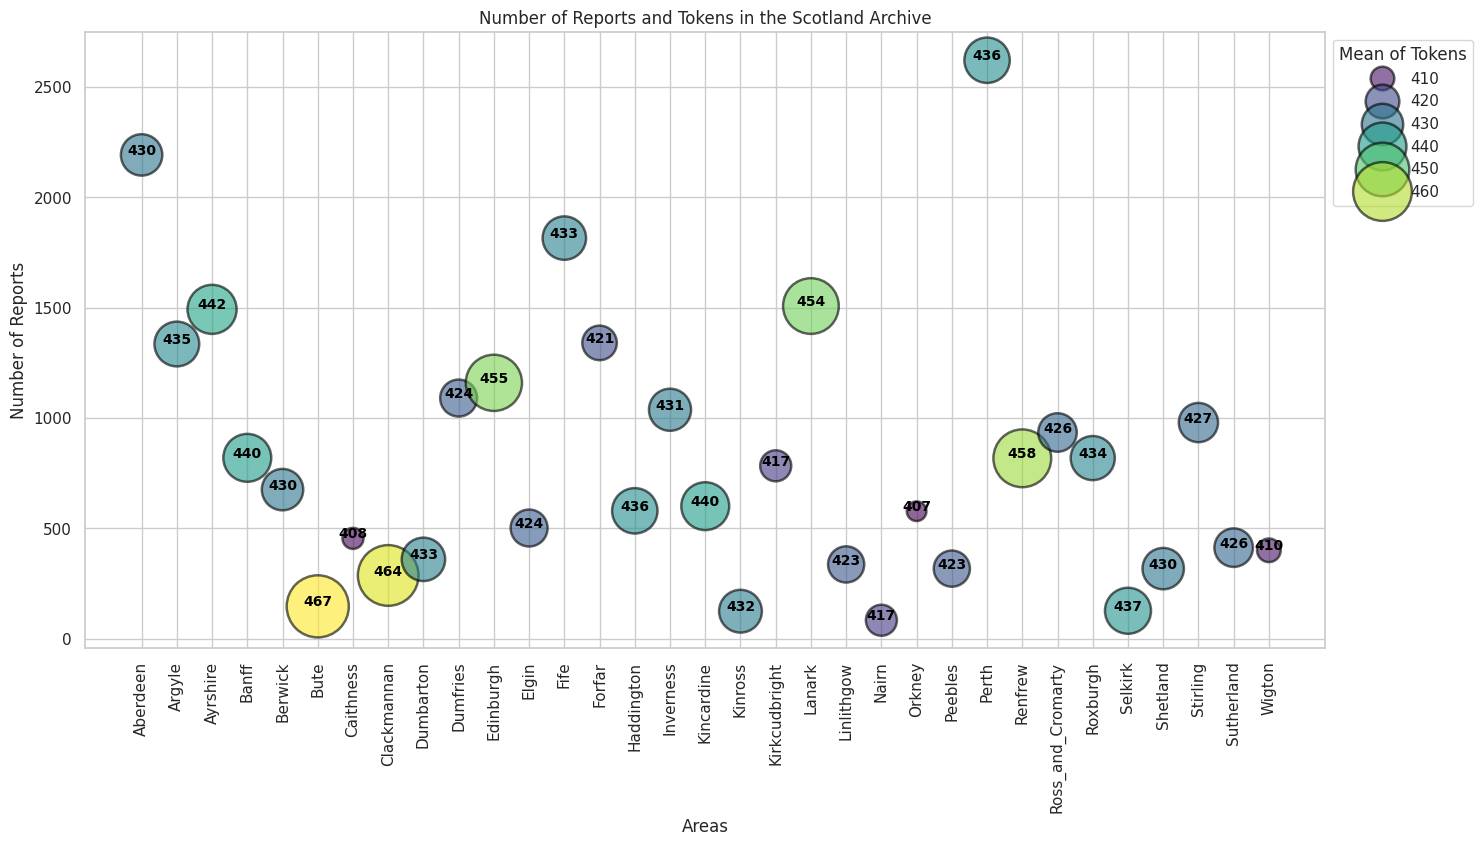

In [112]:
# Ensure that seaborn's aesthetics are used
sns.set_theme(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(16, 8)) #size of the plot
scatter = sns.scatterplot(data=BreakoutScotland,
                          x='Area',
                          y='NReports',
                          size='MeanTokens',
                          hue='MeanTokens',
                          palette='viridis',
                          sizes=(200, 2000),
                          alpha=0.6,
                          edgecolor='black')

# Adding text labels for MeanTokens over the points
for line in range(0, BreakoutScotland.shape[0]): # BreakoutScotland.shape[0] gives the total number of rows in the DataFrame.
    scatter.text(BreakoutScotland.Area[line],# This gets the value from the 'Area' column of the current row (denoted by 'line')and sets it as the x-coordinate where the text will be placed on the scatter plot.
                 BreakoutScotland.NReports[line], # This gets the value from the 'NReports' column of the current row and sets it as the y-coordinate where the text will be placed on the scatter plot.
                 BreakoutScotland.MeanTokens[line],#This gets the value from the 'MeanTokens' column of the current row. This value is the text that will be displayed at the specified x,y coordinate on the plot.
                 horizontalalignment='center', # 'center' aligns the text such that the center of the text string is at the x-coordinate.
                 size='small',
                 color='black',
                 weight='semibold')# Sets the weight (or thickness) of the font of the text. 'semibold' is typically thicker than normal but not as thick as bold.

# Enhance aesthetics
plt.title('Number of Reports and Tokens in the Scotland Archive')
plt.xlabel('Areas')
plt.ylabel('Number of Reports')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.legend(title='Mean of Tokens', loc='upper left', bbox_to_anchor=(1,1))  # Move legend outside the plot
plt.show()

## Exercise 3
- What can you infer from the graph?
- Can you identify possible issues we are going to have when doing the analysis?

# Pre-Processing

In [ ]:
# if the beleow throw you an error because you do not have the Parish object anymore we can re-import it

# URL of the raw CSV file
#url = "https://raw.githubusercontent.com/DCS-training/StatAccountScotland/refs/heads/main/Parish.csv"

# Use pandas to read the CSV file directly from the URL
#Parish = pd.read_csv(url)
#Parish.info()

In [113]:
Parish['Wordtokens'] = Parish['text'].apply(lambda x: word_tokenize(x.lower())) #A lambda function is an anonymous function, defined on-the-fly, and is useful for succinctly expressing small functions.
Parish.head()

,title,text,Type,TypeDescriptive,RecordID,Area,Parish,Tokens,Wordtokens
0,StAS.1.1.203.P.Dumfries.Penpont,of penpont. number xxvi. parish of penpont....,P,Parish,StAS.1.1.203,Dumfries,Penpont,289,"[of, penpont, ., number, xxvi, ., parish, of, ..."
1,StAS.2.15.151.P.Caithness.Wick,wick. 151 of fro...,P,Parish,StAS.2.15.151,Caithness,Wick,482,"[wick, ., 151, of, from, l.30, to, l.100, of, ..."
2,StAS.2.11.22.P.Kincardine.Garvock,"parish of garvock. presbytery of pordoun, sy...",P,Parish,StAS.2.11.22,Kincardine,Garvock,268,"[parish, of, garvock, ., presbytery, of, pordo..."
3,StAS.2.3.279.P.Roxburgh.Bedrule,"parish of bedrule. presbytery of jedburgh, s...",P,Parish,StAS.2.3.279,Roxburgh,Bedrule,412,"[parish, of, bedrule, ., presbytery, of, jedbu..."
4,StAS.1.13.658.P.Argyle.Glassary,"statistical accounts diseases.-coughs, and r...",P,Parish,StAS.1.13.658,Argyle,Glassary,343,"[statistical, accounts, diseases.-coughs, ,, a..."


In [116]:
# Tokenise by Sentences
Parish['Sentencetokens'] = Parish['text'].apply(lambda x: sent_tokenize(x.lower()))
Parish.head()

,title,text,Type,TypeDescriptive,RecordID,Area,Parish,Tokens,Wordtokens,Sentencetokens
0,StAS.1.1.203.P.Dumfries.Penpont,of penpont. number xxvi. parish of penpont....,P,Parish,StAS.1.1.203,Dumfries,Penpont,289,"[of, penpont, ., number, xxvi, ., parish, of, ...","[ of penpont., number xxvi., parish of penpont..."
1,StAS.2.15.151.P.Caithness.Wick,wick. 151 of fro...,P,Parish,StAS.2.15.151,Caithness,Wick,482,"[wick, ., 151, of, from, l.30, to, l.100, of, ...","[ wick., 151 of from l.30 to l.100 of annual ..."
2,StAS.2.11.22.P.Kincardine.Garvock,"parish of garvock. presbytery of pordoun, sy...",P,Parish,StAS.2.11.22,Kincardine,Garvock,268,"[parish, of, garvock, ., presbytery, of, pordo...","[ parish of garvock., presbytery of pordoun, s..."
3,StAS.2.3.279.P.Roxburgh.Bedrule,"parish of bedrule. presbytery of jedburgh, s...",P,Parish,StAS.2.3.279,Roxburgh,Bedrule,412,"[parish, of, bedrule, ., presbytery, of, jedbu...","[ parish of bedrule., presbytery of jedburgh, ..."
4,StAS.1.13.658.P.Argyle.Glassary,"statistical accounts diseases.-coughs, and r...",P,Parish,StAS.1.13.658,Argyle,Glassary,343,"[statistical, accounts, diseases.-coughs, ,, a...","[ statistical accounts diseases.-coughs, and ..."


## Exercise 4

- Compare Wordtokens and Sentencetokens, how was the text divided?
- Can you think to when use one or the other?

You can use the code below to print out specific rows within Sentencetokens or Wordtokens and to check the length of each row

In [118]:
print(Parish['Sentencetokens'].iloc[1])
len(Parish['Sentencetokens'].iloc[1])

[' wick.', '151  of from l.30 to l.100 of annual rcnt, taking care that there should be the greater number at the smaller rent between l.30 and l.60.', 'the state of capital and the physical character of the district apparently point out this as a desirable arrangement.', 'in efflacting it, however, very much tenderness ought to be shown.', 'all great changes ought to be gradual.', 'the violent and extensive ejection of small tenants not having the means of supporting themselves and families till other sources of support are discovered and made available, always occasions an amount of suffering, that can neither be compensated nor atoned for by any consequent agricultural improvements.', 'leases.-at present, leases are given, varying from fourteen to twenty years in duration.', 'if leases are not taken too high, they plainly form a great encouragement to the tenant.', 'but they likewise are as evidently beneficial to the landlord.', "the tenant is induced to lay out both capital and la

482

In [ ]:
print(Parish['Wordtokens'].iloc[1])
len(Parish['Wordtokens'].iloc[1])

For now let's work on the wordtokens. The tokeniser did a good job in finding our words but we can clean it a bit better still.

As usual the process is to create a function that does what we want and then apply it to our dataset

### 1. Clean the tokens
The first step would be to create a function that we want to use and then map it on our dataset
The step we want to do are
- Removing the web addresses
- Remove punctuation and symbols
- Split the hypheneted words


In [119]:
# Function to clean the tokens
def clean_tokens(tokens):
    cleaned_tokens = []
    for token in tokens:
        # Remove any URLs found in the token
        token = re.sub(r'https?://\S+|www\.\S+', '', token) # this step need to be done first or the next one amy remove bits of web addresses making it harder to remove them

        # Remove punctuation and symbols (except hyphens for special handling), and all digits
        token = re.sub(r'[^\w-]', '', token)

        # Split on hyphen and handle each part separately
        parts = token.split('-')
        for part in parts:
            # Now applying strip here to each individual part after all other processing
            part = part.strip()
            # Remove numbers from each part only after splitting and stripping
            part = re.sub(r'\d+', '', part)  # Remove all digits
            # Only add the part to the cleaned_tokens if it is not empty
            if part:
                cleaned_tokens.append(part)

    return cleaned_tokens

In [120]:
Parish['Wordtokens'] = Parish['Wordtokens'].apply(clean_tokens)

In [121]:
#Let's check our results
print(Parish['Wordtokens'].iloc[1])
len(Parish['Wordtokens'].iloc[1])

['wick', 'of', 'from', 'l', 'to', 'l', 'of', 'annual', 'rcnt', 'taking', 'care', 'that', 'there', 'should', 'be', 'the', 'greater', 'number', 'at', 'the', 'smaller', 'rent', 'between', 'l', 'and', 'l', 'the', 'state', 'of', 'capital', 'and', 'the', 'physical', 'character', 'of', 'the', 'district', 'apparently', 'point', 'out', 'this', 'as', 'a', 'desirable', 'arrangement', 'in', 'efflacting', 'it', 'however', 'very', 'much', 'tenderness', 'ought', 'to', 'be', 'shown', 'all', 'great', 'changes', 'ought', 'to', 'be', 'gradual', 'the', 'violent', 'and', 'extensive', 'ejection', 'of', 'small', 'tenants', 'not', 'having', 'the', 'means', 'of', 'supporting', 'themselves', 'and', 'families', 'till', 'other', 'sources', 'of', 'support', 'are', 'discovered', 'and', 'made', 'available', 'always', 'occasions', 'an', 'amount', 'of', 'suffering', 'that', 'can', 'neither', 'be', 'compensated', 'nor', 'atoned', 'for', 'by', 'any', 'consequent', 'agricultural', 'improvements', 'leases', 'at', 'present

425

## Stopword
Stop words are a set of commonly used words in a language. Examples of stop words in English are “a,” “the,” “is,” “are,” etc. Stop words are commonly used in Text Mining and Natural Language Processing (NLP) to eliminate words that are so widely used that they carry very little useful information.

There are two approaches to this: use the embedded remove stopword function or work on the lenght of our tokens

E.g. we can remove short words Remove tokens under 3 characters. (Shorter words won’t tell us much about our data, and because we removed punctuation, we want to get rid of the truncated contractions–e.g. I’m –>‘I’, ‘m’)

In [122]:
# Define a function to filter out tokens with fewer than 3 characters
def filter_tokens(tokens):
    return [token for token in tokens if len(token) >= 3]

In [123]:
# Apply this filter to the DataFrame's 'tokens' column
Parish['filtered_tokens'] = Parish['Wordtokens'].apply(filter_tokens)

In [124]:
print(Parish['filtered_tokens'].iloc[1])

['wick', 'from', 'annual', 'rcnt', 'taking', 'care', 'that', 'there', 'should', 'the', 'greater', 'number', 'the', 'smaller', 'rent', 'between', 'and', 'the', 'state', 'capital', 'and', 'the', 'physical', 'character', 'the', 'district', 'apparently', 'point', 'out', 'this', 'desirable', 'arrangement', 'efflacting', 'however', 'very', 'much', 'tenderness', 'ought', 'shown', 'all', 'great', 'changes', 'ought', 'gradual', 'the', 'violent', 'and', 'extensive', 'ejection', 'small', 'tenants', 'not', 'having', 'the', 'means', 'supporting', 'themselves', 'and', 'families', 'till', 'other', 'sources', 'support', 'are', 'discovered', 'and', 'made', 'available', 'always', 'occasions', 'amount', 'suffering', 'that', 'can', 'neither', 'compensated', 'nor', 'atoned', 'for', 'any', 'consequent', 'agricultural', 'improvements', 'leases', 'present', 'leases', 'are', 'given', 'varying', 'from', 'fourteen', 'twenty', 'years', 'duration', 'leases', 'are', 'not', 'taken', 'too', 'high', 'they', 'plainly',

now let's remove the English stopwords

In [125]:
#from nltk.corpus import stopwords
#nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

In [126]:
# embedding both <3 character and stop words+
def filter_tokens(tokens):
    return [token for token in tokens if len(token) >= 3 and token not in stop_words]

In [127]:
# Apply this filter to the DataFrame's 'tokens' column
Parish['Wordtokens'] = Parish['Wordtokens'].apply(filter_tokens)

In [128]:
print(Parish['Wordtokens'].iloc[1])

['wick', 'annual', 'rcnt', 'taking', 'care', 'greater', 'number', 'smaller', 'rent', 'state', 'capital', 'physical', 'character', 'district', 'apparently', 'point', 'desirable', 'arrangement', 'efflacting', 'however', 'much', 'tenderness', 'ought', 'shown', 'great', 'changes', 'ought', 'gradual', 'violent', 'extensive', 'ejection', 'small', 'tenants', 'means', 'supporting', 'families', 'till', 'sources', 'support', 'discovered', 'made', 'available', 'always', 'occasions', 'amount', 'suffering', 'neither', 'compensated', 'atoned', 'consequent', 'agricultural', 'improvements', 'leases', 'present', 'leases', 'given', 'varying', 'fourteen', 'twenty', 'years', 'duration', 'leases', 'taken', 'high', 'plainly', 'form', 'great', 'encouragement', 'tenant', 'likewise', 'evidently', 'beneficial', 'landlord', 'tenant', 'induced', 'lay', 'capital', 'labour', 'improving', 'farm', 'means', 'landlord', 'estate', 'improved', 'relation', 'indeed', 'landlord', 'tenant', 'involves', 'many', 'reciprocal', 

## Exercise 5
Can you think to possible downsides of removing the stop words?

The last thing we are going to have a look at is how to remove a custom list of words that we do not want to have in our tokens because too popular

In [129]:
custom_stopwords = ['statistical', 'account', 'parish','one', 'year', 'years']

In [130]:
def filter_custom_tokens(tokens, custom_stopwords):
    custom_stopwords_set = set(custom_stopwords)  # Convert list to set for faster lookup
    return [token for token in tokens if token not in custom_stopwords_set]


In [131]:
# Apply this filter to the DataFrame's 'tokens' column
Parish['Wordtokens'] = Parish['Wordtokens'].apply(lambda tokens: filter_custom_tokens(tokens, custom_stopwords))

In [132]:
print(Parish['Wordtokens'].iloc[0])

['penpont', 'number', 'xxvi', 'penpont', 'rev', 'william', 'keyden', 'name', 'situation', 'extent', 'soil', 'surface', 'name', 'probably', 'derived', 'pendents', 'pons', 'arched', 'bridge', 'bridge', 'semicicular', 'arch', 'supported', 'two', 'steep', 'rocks', 'river', 'scarr', 'remote', 'antiquity', 'known', 'built', 'singularity', 'structure', 'nothing', 'kind', 'excited', 'might', 'give', 'occasion', 'name', 'rate', 'name', 'antient', 'appears', 'inscriptions', 'communion', 'cups', 'beginning', 'century', 'penpont', 'presbytery', 'seat', 'situated', 'synod', 'county', 'dumsries', 'bounded', 'nine', 'parishes', 'glencairn', 'tynron', 'keir', 'clofeburn', 'morton', 'durrisdeer', 'sanquhar', 'new', 'cumnock', 'dalry', 'new', 'cumnock', 'presbytery', 'air', 'dalry', 'kirkcudbright', 'scottish', 'miles', 'long', 'average', 'broad', 'extends', 'south', 'east', 'lower', 'extremity', 'continual', 'ascent', 'north', 'west', 'ground', 'banks', 'scarr', 'source', 'feet', 'level', 'river', 'low

## Lemming and Stemming
Ok we are going to look now a last 'cleaning' step we can perform: the lemmatisation and stemmatisation. AS for the stopwords these need to be use with care cause they can alter the meaning of words.



In [133]:
# First the stemming
from nltk.stem import PorterStemmer

# Creating the stemmer
stemmer = PorterStemmer()

In [134]:
Parish['StemmingToken'] = Parish['Wordtokens'].apply(lambda x: [stemmer.stem(token) for token in x])

In [136]:
Parish.iloc[0:10,[8,11]]

,Wordtokens,StemmingToken
0,"[penpont, number, xxvi, penpont, rev, william,...","[penpont, number, xxvi, penpont, rev, william,..."
1,"[wick, annual, rcnt, taking, care, greater, nu...","[wick, annual, rcnt, take, care, greater, numb..."
2,"[garvock, presbytery, pordoun, synod, angus, m...","[garvock, presbyteri, pordoun, synod, angu, me..."
3,"[bedrule, presbytery, jedburgh, synod, merse, ...","[bedrul, presbyteri, jedburgh, synod, mers, te..."
4,"[accounts, diseases, coughs, rheumatisms, freq...","[account, diseas, cough, rheumat, frequent, pa..."
5,"[walls, sandness, walls, sandness, county, ork...","[wall, sand, wall, sand, counti, orkney, zetla..."
6,"[swinton, simprin, table, acres, bolls, wheat,...","[swinton, simprin, tabl, acr, boll, wheat, bar..."
7,"[ayrshire, veneration, memory, good, man, held...","[ayrshir, vener, memori, good, man, held, peop..."
8,"[forfarshire, ries, many, necessaries, life, b...","[forfarshir, rie, mani, necessari, life, broug..."
9,"[stow, far, back, november, may, called, ancie...","[stow, far, back, novemb, may, call, ancient, ..."


In [137]:
# Now with Lemming
from nltk.stem import WordNetLemmatizer
# Downloading necessary resources from NLTK
nltk.download('wordnet')
nltk.download('omw-1.4')
# Creating the lemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [138]:
Parish['LemmTokens'] = Parish['Wordtokens'].apply(lambda x: [lemmatizer.lemmatize(token, pos='v') for token in x])#For better lemmatization, especially for verbs, you can specify the part-of-speech (POS):

In [139]:
Parish.iloc[10:20,[8,11,12]]

,Wordtokens,StemmingToken,LemmTokens
10,"[kirkaldy, sum, exports, kirkaldy, produced, i...","[kirkaldi, sum, export, kirkaldi, produc, impo...","[kirkaldy, sum, export, kirkaldy, produce, imp..."
11,"[edinburghshire, graving, docks, drawbridges, ...","[edinburghshir, grave, dock, drawbridg, area, ...","[edinburghshire, grave, dock, drawbridges, are..."
12,"[kirkoswald, teachers, adventure, state, divis...","[kirkoswald, teacher, adventur, state, divis, ...","[kirkoswald, teachers, adventure, state, divis..."
13,"[gargunnock, convenience, great, quantity, thr...","[gargunnock, conveni, great, quantiti, thresh,...","[gargunnock, convenience, great, quantity, thr..."
14,"[visit, country, thus, follow, constant, succe...","[visit, countri, thu, follow, constant, succes...","[visit, country, thus, follow, constant, succe..."
15,"[dumbarton, civil, history, general, ever, dra...","[dumbarton, civil, histori, gener, ever, drawn...","[dumbarton, civil, history, general, ever, dra..."
16,"[graitney, confluence, kirtle, solway, seen, m...","[graitney, confluenc, kirtl, solway, seen, man...","[graitney, confluence, kirtle, solway, see, ma..."
17,"[traveller, feels, material, difference, clima...","[travel, feel, materi, differ, climat, counti,...","[traveller, feel, material, difference, climat..."
18,"[young, girls, receive, foundation, various, b...","[young, girl, receiv, foundat, variou, branch,...","[young, girls, receive, foundation, various, b..."
19,"[struction, also, carts, country, part, town, ...","[struction, also, cart, countri, part, town, c...","[struction, also, cart, country, part, town, c..."


## Exercise 6
- Can you tell the difference between the different strategies?
- What do you think are the pro and con?

This is the end of the first part! To make sure that we are going to restart on the same dataset let's export it as a .csv

In [140]:
# We can also save our new dataframe as a.csv file so that we will be easily re-import it
Parish.to_csv('Parish.csv', index=False)